In [229]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [244]:
n_task_per_file = 50
n_files = 10
base_dir = "noise_sd=10/vary_r_noisesd_10.0_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [245]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [246]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.800000,0.833333,0.833333,0.333333,0.200000,0.666667
1,0.714286,1.000000,1.000000,1.000000,0.857143,0.400000
2,0.428571,1.000000,0.666667,1.000000,1.000000,0.714286
3,1.000000,1.000000,0.833333,0.500000,0.333333,0.333333
4,1.000000,1.000000,1.000000,1.000000,0.000000,0.666667
...,...,...,...,...,...,...
18,0.500000,1.000000,1.000000,0.833333,0.666667,0.666667
19,1.000000,0.833333,0.000000,0.166667,0.200000,0.166667
20,1.000000,1.000000,1.000000,0.833333,1.000000,0.666667
21,1.000000,0.833333,0.500000,0.333333,0.833333,0.285714


In [247]:
length_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,1.720426,1.744479,1.758101,1.770713,1.663396,1.574149
1,1.769288,1.599362,1.680087,1.613193,1.629324,1.352593
2,1.593350,1.641614,1.599998,1.525668,1.479770,1.763366
3,1.730188,1.878501,1.731958,1.752509,1.574509,1.533416
4,1.600017,1.758417,1.705460,1.622456,1.557278,1.402749
...,...,...,...,...,...,...
18,1.567138,1.666135,1.610879,1.678398,1.501018,1.466012
19,1.974598,1.750694,2.007766,1.788281,1.850649,1.634336
20,1.880887,1.661404,1.609313,1.715416,1.602022,1.494600
21,1.902876,1.772609,1.762730,1.730683,1.780016,1.527117


In [248]:
MSE_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,5.558406,5.201157,5.243837,5.603057,5.553532,5.011094
1,5.196708,6.559581,4.768971,5.317242,6.315192,6.101330
2,5.892188,5.298818,5.044940,5.632851,5.519271,4.957423
3,4.503378,5.389913,5.239771,5.702161,5.069894,5.430692
4,4.457566,3.682974,5.447136,4.418346,5.965792,5.336477
...,...,...,...,...,...,...
18,5.153283,4.854881,4.656029,5.329814,4.983651,4.701333
19,5.231714,4.360621,5.209790,4.701896,4.716784,4.666963
20,5.642730,5.636574,6.067359,5.453112,5.232576,5.907925
21,5.346795,5.026075,5.718936,6.535997,6.076321,6.044208


In [249]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,20)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 5.00     0.883546
10.00    0.875410
20.00    0.813921
0.05     0.647558
0.10     0.468267
0.20     0.422766
dtype: float64
Length :
 5.00     1.747530
10.00    1.741557
20.00    1.741194
0.05     1.689401
0.10     1.598789
0.20     1.482754
dtype: float64
MSE :
 5.00     5.306567
10.00    5.354769
20.00    5.337974
0.05     5.398139
0.10     5.367357
0.20     5.329066
dtype: float64


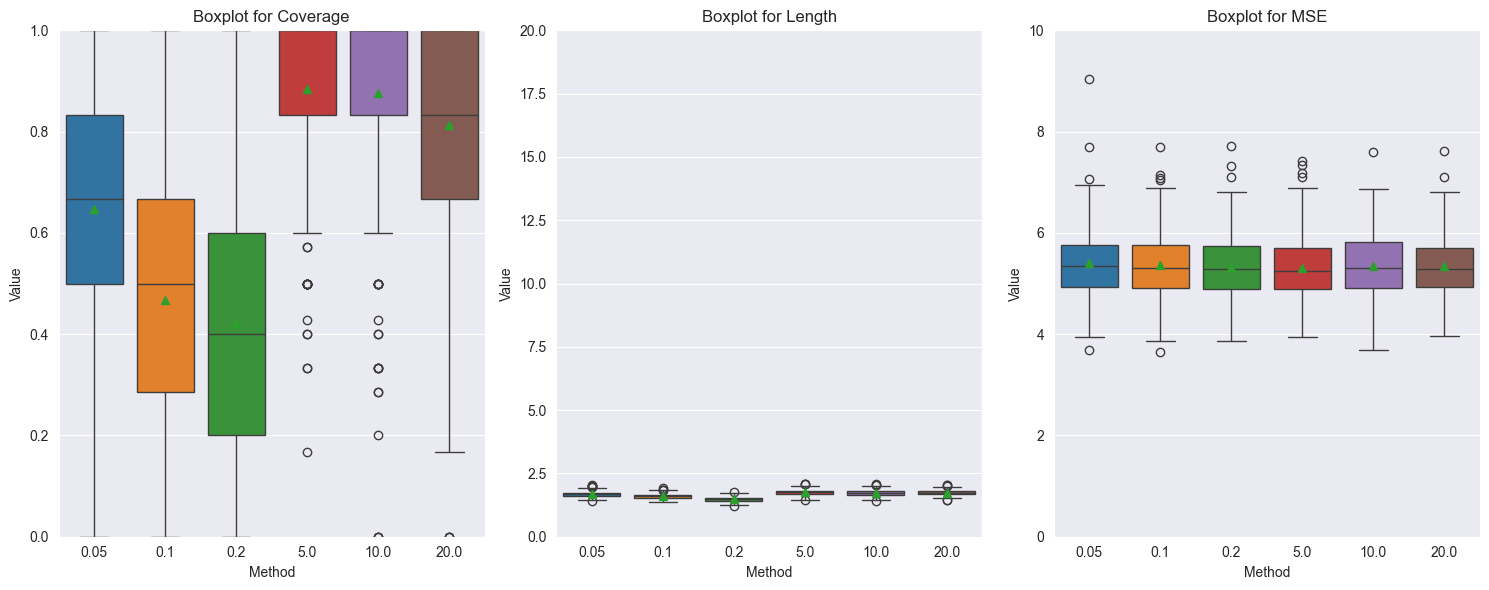

In [250]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

Coverage :
 5.00     0.883546
10.00    0.875410
20.00    0.813921
0.05     0.647558
0.10     0.468267
0.20     0.422766
dtype: float64
Length :
 5.00     1.747530
10.00    1.741557
20.00    1.741194
0.05     1.689401
0.10     1.598789
0.20     1.482754
dtype: float64
MSE :
 5.00     5.306567
10.00    5.354769
20.00    5.337974
0.05     5.398139
0.10     5.367357
0.20     5.329066
dtype: float64


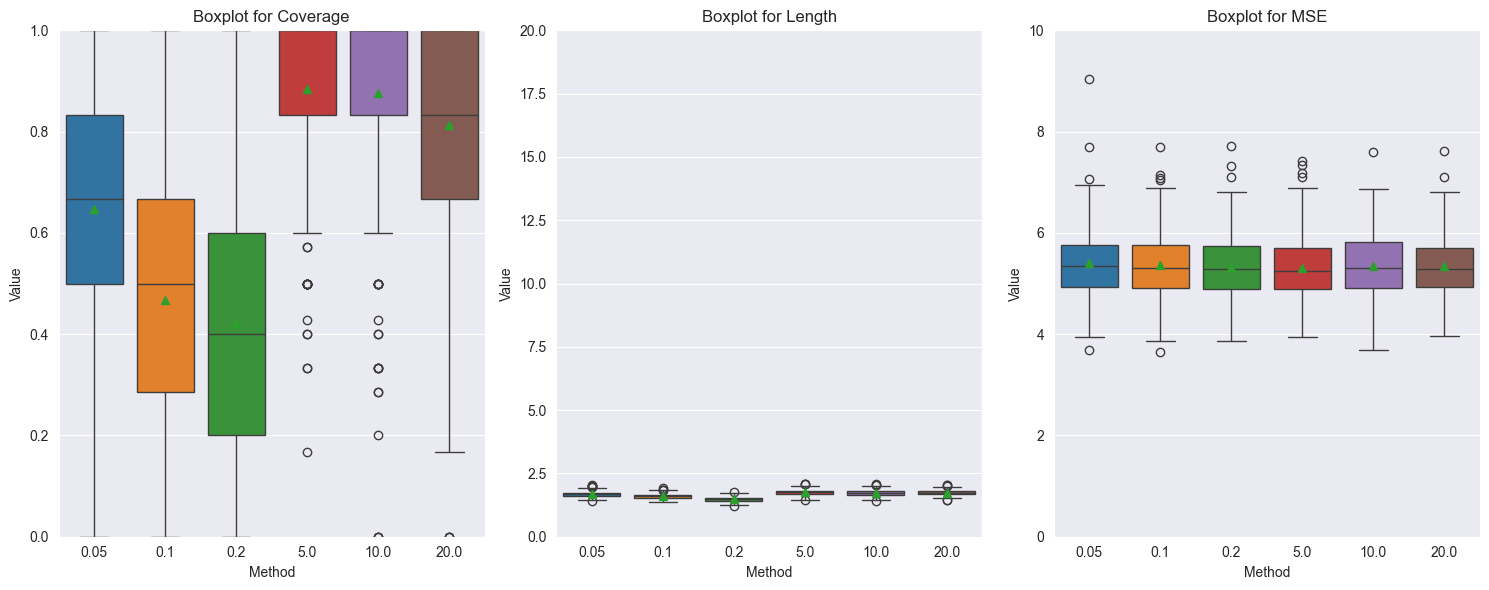

In [178]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [155]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.714286,1.000000,1.000000,1.000000,1.000000,0.833333
1,0.833333,0.833333,0.833333,1.000000,1.000000,0.500000
2,0.500000,0.833333,1.000000,0.333333,0.833333,0.833333
3,0.833333,1.000000,0.857143,0.500000,0.833333,1.000000
4,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
4,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
5,0.833333,1.000000,1.000000,0.857143,0.600000,0.833333
6,1.000000,1.000000,1.000000,0.800000,0.833333,1.000000
7,1.000000,1.000000,1.000000,0.166667,1.000000,0.800000
